In [1]:
import os

data_root = '/home/jhyang/WORKSPACES/DATA/synthesis/SynthesisSimilarity/rsc'
os.listdir(data_root)

['ele_order_counter.json',
 'pre_count_normalized_by_rxn_ss.json',
 'data_split.npz',
 'reactions_v20_20210820_ss.jsonl']

In [2]:
import json
with open(f'{data_root}/reactions_v20_20210820_ss.jsonl') as f:
    full_data = [json.loads(l) for l in list(f)]

In [364]:
for i, data in enumerate(full_data):
    if 'Dy' in data['target']['material_formula']:
        print(i, data['doi'])
        print(data['target']['material_formula'])

278 10.1149/1.2766607
DyxZn1-xGa2O4
283 10.1149/1.2780859
Dy0.05ZnGa1.95O4
413 10.1149/1.3560528
DyxLi3Ba2Y3-x(MoO4)8
587 10.1149/2.1201704jes
Dy0.08W0.04Bi0.88O1.56
588 10.1149/2.1201704jes
Dy0.24W0.08Bi0.70O1.5
1222 10.1039/c3tc32345e
Bi1-xDyxFeO3
1419 10.1039/c7tc03260a
Lu1-xDyxNbO4
2015 10.1039/c2ra21352d
Dy1-xBixO1.50
2124 10.1021/cg100429b
(Lu1-yDyy)2SiO5
2125 10.1021/cg100429b
(Lu1-x-yGdxDyy)2SiO5
2126 10.1021/cg100429b
(Gd1-yDyy)2SiO5
2147 10.1021/cm980563y
Ca1.7Dy0.3MnO4
2805 10.1021/cm2006956
Dy1-xYxMnO3
2810 10.1021/cm302446e
DyxBi1-xO1.5
3619 10.1021/acs.inorgchem.5b01656
Sr1-x-yEuxDyyAl2O4
4135 10.1021/ja9919635
DyCu0.32Te2
4569 10.1111/j.1551-2916.2005.00211.x
Dy2TiO5
4570 10.1111/j.1551-2916.2005.00211.x
Dy2TiO5
4836 10.1111/ijac.12573
Ti1-xDyxO2
5354 10.1007/s10854-016-5176-z
Sr3-3xDy3xP4O13
5492 10.1007/s10008-012-1889-y
DyRhO3
5493 10.1007/s10008-012-1889-y
DyRhO3
5671 10.1007/s10854-016-4686-z
BaBi4-xDyxTi4O15
5717 10.1007/s10854-015-2927-1
DyxCa1-xTiO3
5727 10.1007/

In [600]:
import numpy as np
i = np.random.randint(len(full_data))

_data = full_data[36728]

#for _data in full_data:
#    if _data['doi'] != '10.1103/physrevb.95.054430':
#        continue

def print_data(dat):
    for key in ['material_string','material_formula']:
        print(key, '\t:', dat[key])
    for _d in dat['composition']:
        print('\t', _d['formula'], '/', _d['elements'])
print(i, _data['doi'])
print_data(_data['target'])
print()
for _prec in _data['precursors']: print_data(_prec)

494 10.1111/jace.17226
material_string 	: (Nb1/3Ta1/3Ti1/3)N1-δ
material_formula 	: (Nb1/3Ta1/3Ti1/3)N1-δ
	 (Nb1/3Ta1/3Ti1/3)N1-δ / {'Nb': '0.333', 'Ta': '0.333', 'Ti': '0.333', 'N': '1-δ'}

material_string 	: NbN
material_formula 	: NbN
	 NbN / {'Nb': '1', 'N': '1'}
material_string 	: TaN
material_formula 	: TaN
	 TaN / {'Ta': '1', 'N': '1'}
material_string 	: titanium nitride
material_formula 	: Ti3N4
	 Ti3N4 / {'Ti': '3', 'N': '4'}
material_string 	: niobium nitride
material_formula 	: Nb3N5
	 Nb3N5 / {'Nb': '3', 'N': '5'}


In [3]:
import numpy as np

npz_data = np.load(f'{data_root}/data_split.npz', allow_pickle=True)

In [463]:
for ds_rxn, ds in npz_data.items():
    for i, d in enumerate(ds):
#        n = (d['target_comp'][0] != d['target_comp_featurized'][0]).sum()
        chem = d['prototype_path'][0].split('/')[-1]
        n = len(oxy.findall(chem))
        if n > 1:
            print(ds_rxn, i)
#        if d['doi'] == '10.1016/j.actamat.2006.08.010':
#            print(ds_rxn, i)
#            for prot in d['prototype_path']:
#                print(prot.split('/')[4:])

In [516]:
import re

re_spec = re.compile(r'\d+(\.\d+)?')
re_ele = re.compile(r'[A-Z][a-z]?')
print(chem)
chem = dat['prototype_path'][0].split('/')[-1]
ns = [float(m.group()) for m in re_spec.finditer(chem)]
eles = [m.group() for m in re_ele.finditer(chem)]
print(eles, ns)
#comp = dat['target_comp'][0]
#m = comp != 0
#
#for i in np.where(m)[0]:
#    print(i, comp[i])

Mg0.05Ta2.00000024Ti2.00000024Cu2.95000029O12
['Ba', 'Sr', 'Nb', 'O'] [0.5, 0.5, 2.0, 6.0]


In [578]:
for ds_rxn, ds in npz_data.items():
    for i, d in enumerate(ds):
        if len(d['target_comp']) != 1:
            print(ds_rxn, i, d['raw_id'])

In [553]:
ele_dict = {i:{} for i in range(83)}
#for d in npz_data['test_reactions']:
for ds_rxn, ds in npz_data.items():
    for i, d in enumerate(ds):
        chem = d['prototype_path'][0].split('/')[-1]
        if '(' in chem: continue
        ns = [float(m.group()) for m in re_spec.finditer(chem)]
        eles = [m.group() for m in re_ele.finditer(chem)]
        if len(eles) != len(ns): continue
        comp = d['target_comp'][0]
        idxs = np.where(comp != 0)[0]
#        print(chem)
#        print(eles)
#        print(ns)
#        print(comp[idxs] * np.sum(ns))
    #    print(idxs)
        for n, ele in zip(ns, eles):
            j = np.where(np.abs(comp[idxs] * np.sum(ns) - n) < 1e-3)[0]
            if len(j) != 1:
                continue
            k = idxs[j[0]]
#            print(ele, j[0], idxs[j[0]])
            if ele not in ele_dict[k].keys():
                ele_dict[k][ele] = 0
            ele_dict[k][ele] += 1
#            if ele_dict[k][ele] < 15:
#                ele_dict[k]['ids'].append(d['doi'])

In [604]:
#for k, v in ele_dict.items():
#    if len(v.keys()) == 1:
#        ele_dict[k] = list(v.keys())[0]
with open('../data/raw_element_order.json','w') as f:
    json.dump(ele_dict, f, indent=4)

In [623]:
import copy
parsed_data = {}
for k, ds in npz_data.items():
    parsed_data[k] = []
    for d in ds:
        _d = {}
        for _k in ['id', 'raw_index', 'doi', 'year', 'count_weight', 'synthesis_type', 'prototype_path', 'operations']:
            _d[_k] = copy.deepcopy(d[_k])
        tgt_vals = d['target_comp'][0]
        _d['target_comp'] = {ele_dict[i]:tgt_vals[i] for i in np.where(tgt_vals != 0)[0]}
        
        _d['precursors_comp'] = []
        for prc_vals in d['precursors_comp']:
            _d['precursors_comp'].append({ele_dict[i]: prc_vals[0][i] for i in np.where(prc_vals[0] != 0)[0]})
        parsed_data[k].append(_d)

In [625]:
import gzip, pickle
with open('../data/parsed_data.pkl','wb') as f:
    pickle.dump(parsed_data, f)

In [639]:
for d in ds[:30]:
    print([op['type'] for op in d['operations']])

['StartingSynthesis', 'ShapingOperation', 'HeatingOperation', 'MixingOperation', 'MixingOperation', 'ShapingOperation', 'ShapingOperation', 'ShapingOperation', 'MixingOperation', 'HeatingOperation']
['StartingSynthesis', 'ShapingOperation', 'HeatingOperation', 'MixingOperation', 'MixingOperation', 'ShapingOperation', 'ShapingOperation', 'ShapingOperation', 'MixingOperation', 'HeatingOperation']
['StartingSynthesis', 'ShapingOperation', 'HeatingOperation', 'MixingOperation', 'MixingOperation', 'ShapingOperation', 'ShapingOperation', 'ShapingOperation', 'MixingOperation', 'HeatingOperation']
['StartingSynthesis', 'ShapingOperation', 'HeatingOperation', 'MixingOperation', 'MixingOperation', 'ShapingOperation', 'ShapingOperation', 'ShapingOperation', 'MixingOperation', 'HeatingOperation']
['StartingSynthesis', 'ShapingOperation', 'HeatingOperation', 'MixingOperation', 'MixingOperation', 'ShapingOperation', 'ShapingOperation', 'ShapingOperation', 'MixingOperation', 'HeatingOperation']
['Sta

In [644]:
lengths = {}
op_typs = {}
for i, (k, ds) in enumerate(parsed_data.items()):
    lengths[k] = np.zeros(50)
    for d in ds:
        ops = d['operations']
        n = len(ops)
        for op in ops:
            op_typ = op['type']
            if op_typ not in op_typs.keys():
                op_typs[op_typ] = [0, 0, 0]
            op_typs[op_typ][i] +=1
            

In [771]:
has_temp_op = {}
#units = {}
temp_op_div = {}
time_op_div = {}
temp_time_map = {}
for k, ds in parsed_data.items():
    has_temp_op[k] = np.zeros(11)
    temp_op_div[k] = [[] for _ in range(11)] 
    time_op_div[k] = [[] for _ in range(11)] 
    temp_time_map[k] = np.zeros((11,11))
    for d in ds:
        has_op = 0
        for op in d['operations']:
            op_type = op['type']
            if op_type != 'HeatingOperation':
                continue
            op_temp = op['attributes']['temperature']
            op_time = op['attributes']['time']
            if len(op_temp) != 0:
                temps = set(np.hstack([t['values'] for t in op_temp] + [t['min'] for t in op_temp] + [t['max'] for t in op_temp]))
                temps = np.array([t for t in temps if t != None])
                times = []
                if len(op_time) != 0:
                    times = set(np.hstack([t['values'] for t in op_time] + [t['min'] for t in op_time] + [t['max'] for t in op_time]))
                    times = np.array([t for t in times if t != None])
                temp_time_map[k][len(temps), len(times)] += 1
                if len(temps) > 1:
                    for i1, t1 in enumerate(temps[:-1]):
                        for t2 in temps[i1+1:]:
                            temp_op_div[k][len(temps)].append(np.abs(t1 - t2))
                if len(times) > 1:
                    for i1, t1 in enumerate(times[:-1]):
                        for t2 in times[i1+1:]:
                            time_op_div[k][len(times)].append(np.abs(t1 - t2))
#                if np.sum(temps < 10) != 0:
#                    print(op_temp)
#                temp_op_div[k][len(temps)].append(temps)
#        has_temp_op[k][has_op] += 1
#                if op_type not in temp_op_counts.keys():
#                    temp_op_counts[op_type] = 0
#                temp_op_counts[op_type] += 1
                #for t in op_temp + op_time:
                #    unit = t['units']
                #    if unit not in units.keys():
                #        units[unit] = 0
                #    units[unit] += 1

In [773]:
temp_op_div

{'train_reactions': [[],
  [],
  [200.0,
   20.0,
   250.0,
   250.0,
   250.0,
   50.0,
   50.0,
   120.0,
   120.0,
   120.0,
   120.0,
   120.0,
   730.0,
   730.0,
   730.0,
   730.0,
   200.0,
   200.0,
   200.0,
   200.0,
   150.0,
   30.0,
   30.0,
   30.0,
   30.0,
   100.0,
   600.0,
   70.0,
   70.0,
   1150.0,
   110.0,
   110.0,
   110.0,
   50.0,
   50.0,
   50.0,
   50.0,
   50.0,
   200.0,
   200.0,
   200.0,
   200.0,
   200.0,
   50.0,
   50.0,
   50.0,
   50.0,
   50.0,
   50.0,
   50.0,
   280.0,
   230.0,
   350.0,
   200.0,
   50.0,
   50.0,
   50.0,
   50.0,
   270.0,
   270.0,
   270.0,
   270.0,
   200.0,
   400.0,
   400.0,
   400.0,
   400.0,
   150.0,
   150.0,
   150.0,
   150.0,
   150.0,
   150.0,
   150.0,
   150.0,
   150.0,
   200.0,
   200.0,
   30.0,
   30.0,
   30.0,
   300.0,
   10.0,
   100.0,
   100.0,
   200.0,
   100.0,
   100.0,
   100.0,
   100.0,
   648.0,
   450.0,
   250.0,
   100.0,
   50.0,
   50.0,
   50.0,
   50.0,
   50.0,
   50.0,
   

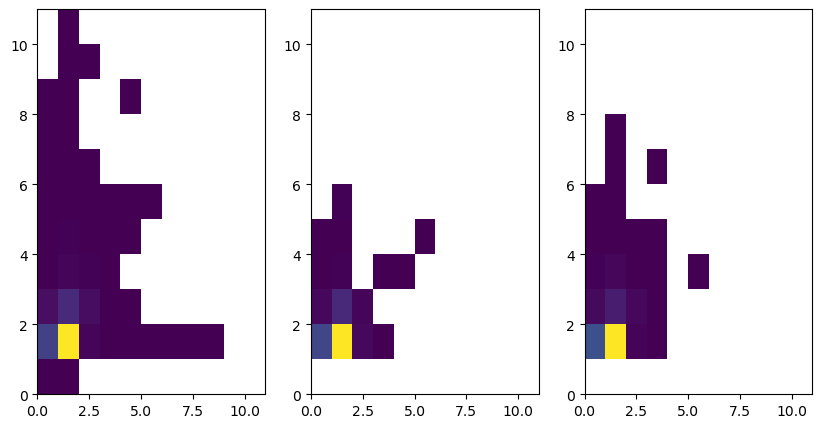

In [765]:
cmap = mpl.cm.viridis
cmap.set_under([1,1,1])
f, axs = plt.subplots(1,3,figsize=(10,5))
for i, (k,v) in enumerate(temp_time_map.items()):
    axs[i].pcolormesh(v, vmin=1, cmap=cmap)
    

In [750]:
unit_convertors = {
    '°C': lambda x: x+273.15,
    'h': lambda x: x,
    'K': lambda x: x,
    'hours': lambda x: x,
    'min': lambda x: x/60,
    'day': lambda x: x * 24,
    'd': lambda x: x * 24,
    'C': lambda x: x + 273.15,
    'minutes': lambda x: x/60,
    'hrs': lambda x: x,
    'hr': lambda x: x,
    'hour': lambda x: x,
}

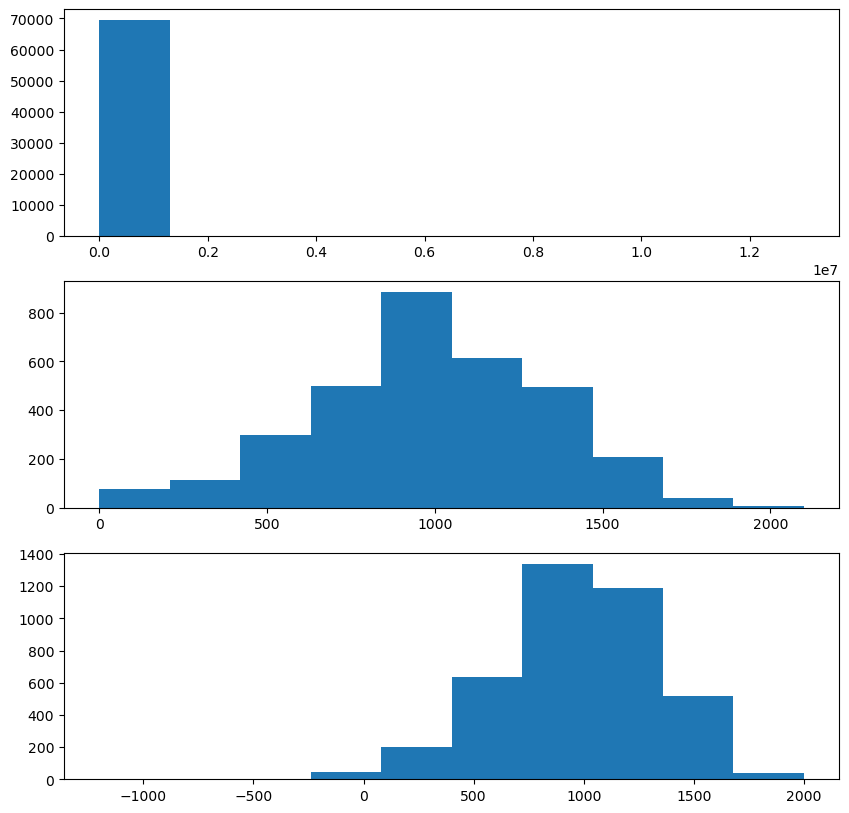

In [726]:
f, axs = plt.subplots(3,1,figsize=(10, 10))
for i, (k, v) in enumerate(temp_op_div.items()):
    axs[i].hist(np.hstack([np.hstack(_v) for _v in v if len(_v) > 0]))

In [744]:
for k, v in temp_op_div.items():
    vs = np.hstack([np.hstack(_v) for _v in v if len(_v) > 0])
    np.set_printoptions(suppress=True)
    print(vs[vs > 1e5])
    print(vs[vs < 0])

[10001100.   800960. 12001600.   750850.  9001000.   750850.  9001000.
   750850.  9001000.   750850.  9001000.   750850.  9001000.   800940.
   450600.  9001150. 13001400. 13001400. 13001400. 13001400. 13001400.
   300400.   600700.   400900.]
[-1025. -1500. -1500. -1100.  -100.  -100.  -100.]
[]
[]
[]
[  -10.   -60. -1200.]


In [725]:
np.hstack([np.hstack(_v) for _v in v if len(_v) > 0])

array([580., 580., 580., ..., 530., 570., 540.])

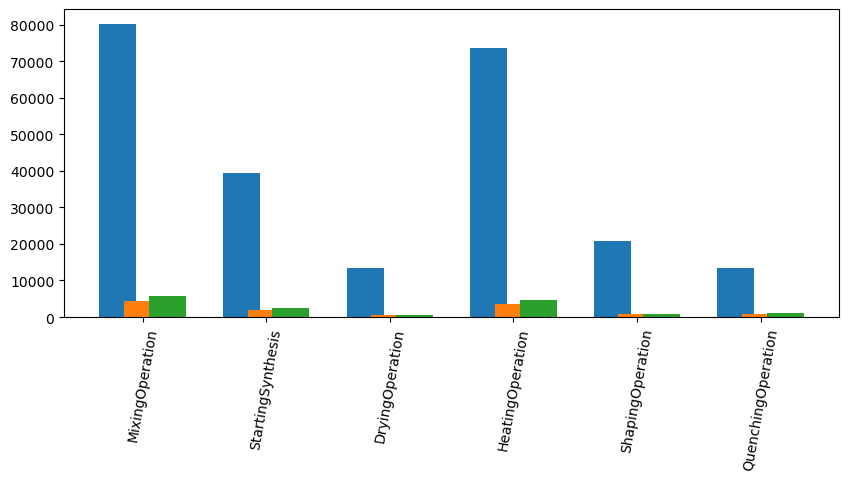

In [650]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1,1,figsize=(10,4))
vals = np.array(list(op_typs.values()))
keys = np.array(list(op_typs.keys()))

for i in range(3):
    ax.bar(np.arange(len(keys)) + (i-1) * 0.2, vals.T[i], width=0.3)
ax.set_xticks(np.arange(len(keys)), labels=keys, rotation=80)

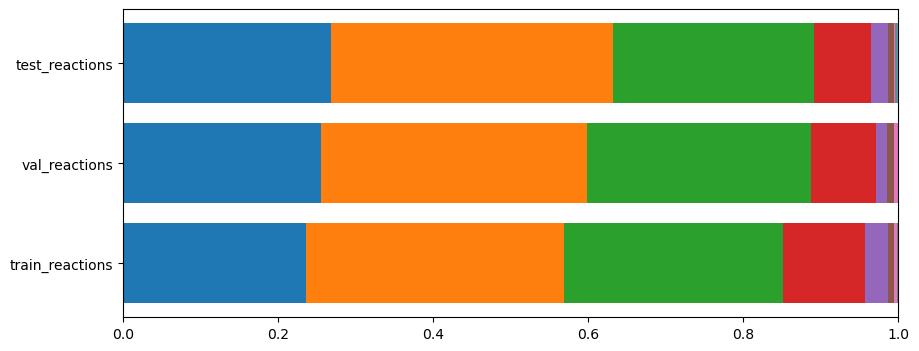

In [682]:
import matplotlib as mpl
f, ax = plt.subplots(1,1,figsize=(10,4))
for i, (k, v) in enumerate(has_temp_op.items()):
    b = 0.
    for j, _v in enumerate(v):
        ax.barh(y=i, width=_v/np.sum(v), left=b, color=mpl.cm.tab10(j))
        b += _v/np.sum(v)
ax.set_yticks([0,1,2], labels=list(has_temp_op.keys()))